<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn2%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:

data = pd.read_csv('drive/MyDrive/data.csv')
print(data.head())

         TIME     RON
0  2021-01-01  4.9493
1  2021-01-02  4.9493
2  2021-01-03  4.9493
3  2021-01-04  4.8713
4  2021-01-05  4.8721


In [32]:
data.index = pd.to_datetime(data['TIME'], format='%Y-%m-%d')

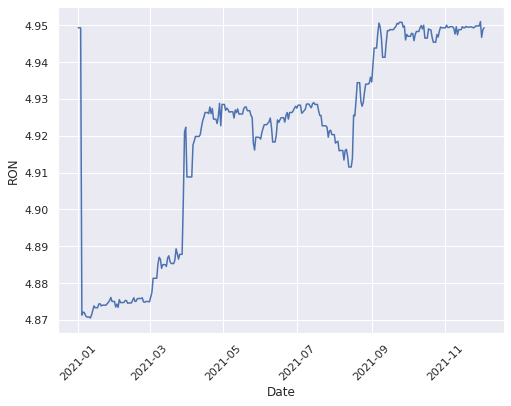

In [33]:
sns.set()
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['RON'], )

In [34]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
print(train)

                  TIME     RON
TIME                          
2021-01-01  2021-01-01  4.9493
2021-01-02  2021-01-02  4.9493
2021-01-03  2021-01-03  4.9493
2021-01-04  2021-01-04  4.8713
2021-01-05  2021-01-05  4.8721
...                ...     ...
2021-09-26  2021-09-26  4.9508
2021-09-27  2021-09-27  4.9495
2021-09-28  2021-09-28  4.9498
2021-09-29  2021-09-29  4.9460
2021-09-30  2021-09-30  4.9475

[273 rows x 2 columns]


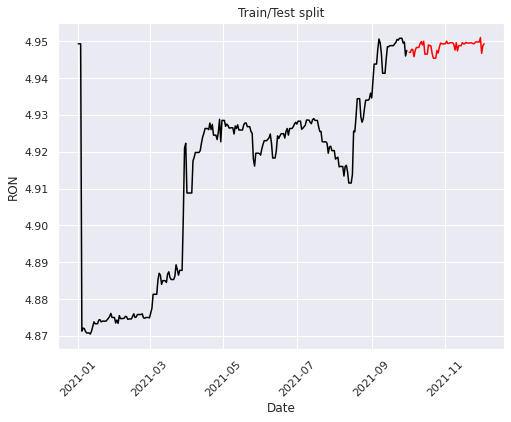

In [35]:
train = data[data.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2021-10-01 00:00:00   2021-12-02 00:00:00
TIME
2021-10-02    4.947654
2021-10-03    4.947521
2021-10-04    4.947629
2021-10-05    4.947535
2021-10-06    4.947609
                ...   
2021-11-29    4.947464
2021-11-30    4.947462
2021-12-01    4.947460
2021-12-02    4.947458
2021-12-03    4.947456
Name: Predictions, Length: 63, dtype: float64
MSE:  0.001713416395447337


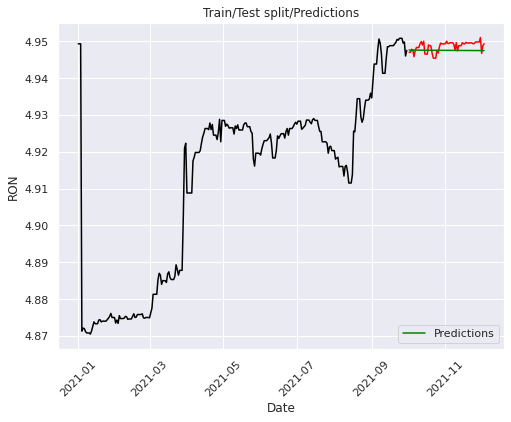

In [36]:
#1
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
ARMAmodel = SARIMAX(y, order = (2, 1, 2))
ARMAmodel = ARMAmodel.fit(disp=False)

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
#print(y_pred_df)

start = y_pred_df.index[0]
end = y_pred_df.index[-1]

print(start,' ', end)

y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

print(y_pred_out)

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  0.004737733387625022


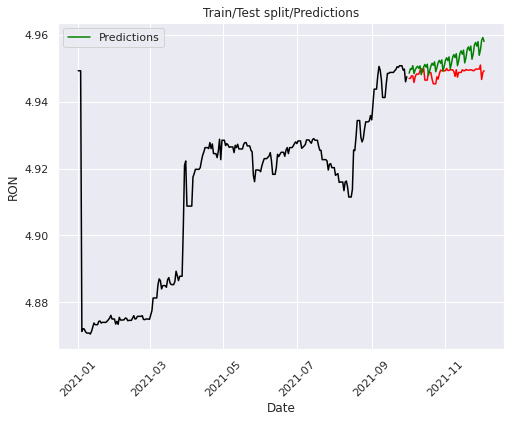

In [37]:
#2
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['RON']
#print(y)
SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,2,2,6))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
#print(y_pred)
y_pred_df = y_pred.conf_int(alpha = 0.6) 
#print(y_pred_df)

y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['RON'], color = "black")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split/Predictions")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["RON"].values, y_pred_df["Predictions"]))
print("MSE: ",arma_rmse)

In [52]:
print(len(data))
#1-300
train = data.iloc[:300]
#301-337
test = data.iloc[300:]

337


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669

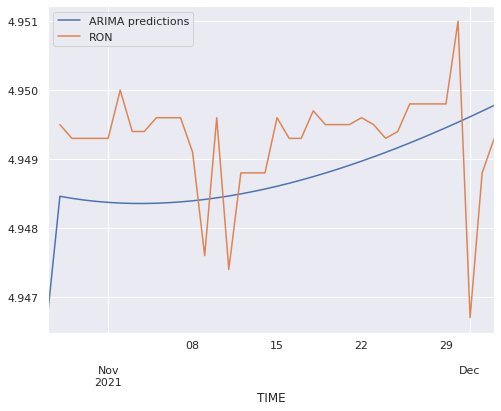

In [72]:
from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(train['RON'],order=(1,0,5))
model=ARIMA(train['RON'],order=(1,1,2))
model=model.fit()
model.summary()

pred=model.predict(start='2021-10-27',end='2021-12-03',typ='levels').rename('ARIMA predictions')
#pred=model.predict(start=len(train),end=len(train)+len(test)-1,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True)
test['RON'].plot(legend=True)

In [42]:
test['RON'].mean()

4.949286486486487

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RON']))
print(rmse)

0.0009698185464521372


In [65]:
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(data['RON'],order=(1,0,5))
model2=model2.fit()
data.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,TIME,RON
TIME,,
2021-11-29,2021-11-29,4.9498
2021-11-30,2021-11-30,4.9510
2021-12-01,2021-12-01,4.9467
2021-12-02,2021-12-02,4.9488
2021-12-03,2021-12-03,4.9493


2021-12-04    4.949234
2021-12-05    4.948491
2021-12-06    4.948605
2021-12-07    4.948075
2021-12-08    4.947703
2021-12-09    4.947412
2021-12-10    4.947124
2021-12-11    4.946840
2021-12-12    4.946560
2021-12-13    4.946285
2021-12-14    4.946013
2021-12-15    4.945745
2021-12-16    4.945480
2021-12-17    4.945219
2021-12-18    4.944962
2021-12-19    4.944709
2021-12-20    4.944459
2021-12-21    4.944212
2021-12-22    4.943969
2021-12-23    4.943729
2021-12-24    4.943493
2021-12-25    4.943260
2021-12-26    4.943030
2021-12-27    4.942803
2021-12-28    4.942580
2021-12-29    4.942359
2021-12-30    4.942142
2021-12-31    4.941928
2022-01-01    4.941716
2022-01-02    4.941508
2022-01-03    4.941302
Freq: D, Name: ARIMA Predictions, dtype: float64


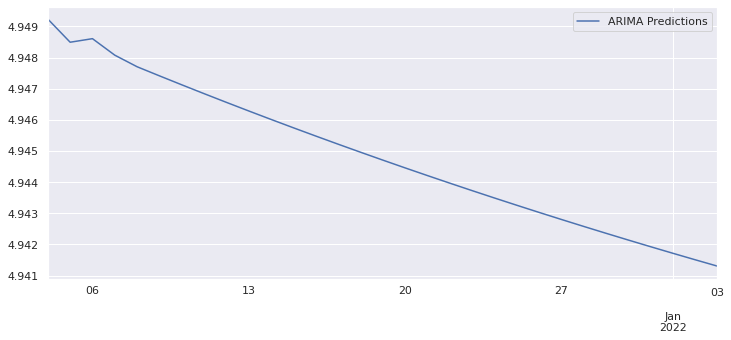

In [70]:
index_future_dates=pd.date_range(start='2021-12-04',end='2022-01-03')
pred=model2.predict(start='2021-12-04',end='2022-01-03').rename('ARIMA Predictions')
#pred=model2.predict(start=len(data),end=len(data)+30).rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)